## importing liberaries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### importing dataset

In [4]:
df = pd.read_csv("database SFRC.csv")

In [5]:
# dependent and independent variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [6]:
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

In [7]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

### train_Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(390, 8)
(98, 8)
(390,)
(98,)


## Decission tree model

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
DTR = DecisionTreeRegressor(criterion='friedman_mse',min_samples_leaf=1,min_samples_split=7)

In [10]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=7)

In [11]:
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [12]:
y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)

### Evaluating Model

In [13]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [14]:
# evaluating model performance
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,DTR.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,DTR.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,DTR.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,DTR.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,DTR.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,DTR.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,DTR.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,DTR.predict(X_train)))

The RMSE  on the testing dataset is:  45.487073349430496
The RMSE  on the training dataset is:  30.68176663361933
The MSE  on the testing dataset is:  2069.07384189647
The MSE  on the training dataset is:  941.3708037598765
The MAE  on the testing dataset is:  27.77957798353401
The MAE  on the training daset is:  12.068088692336753
The r2_score on the testing dataset is:  0.9157029258941279
The r2_score on the training dataset is:  0.9570145971946036


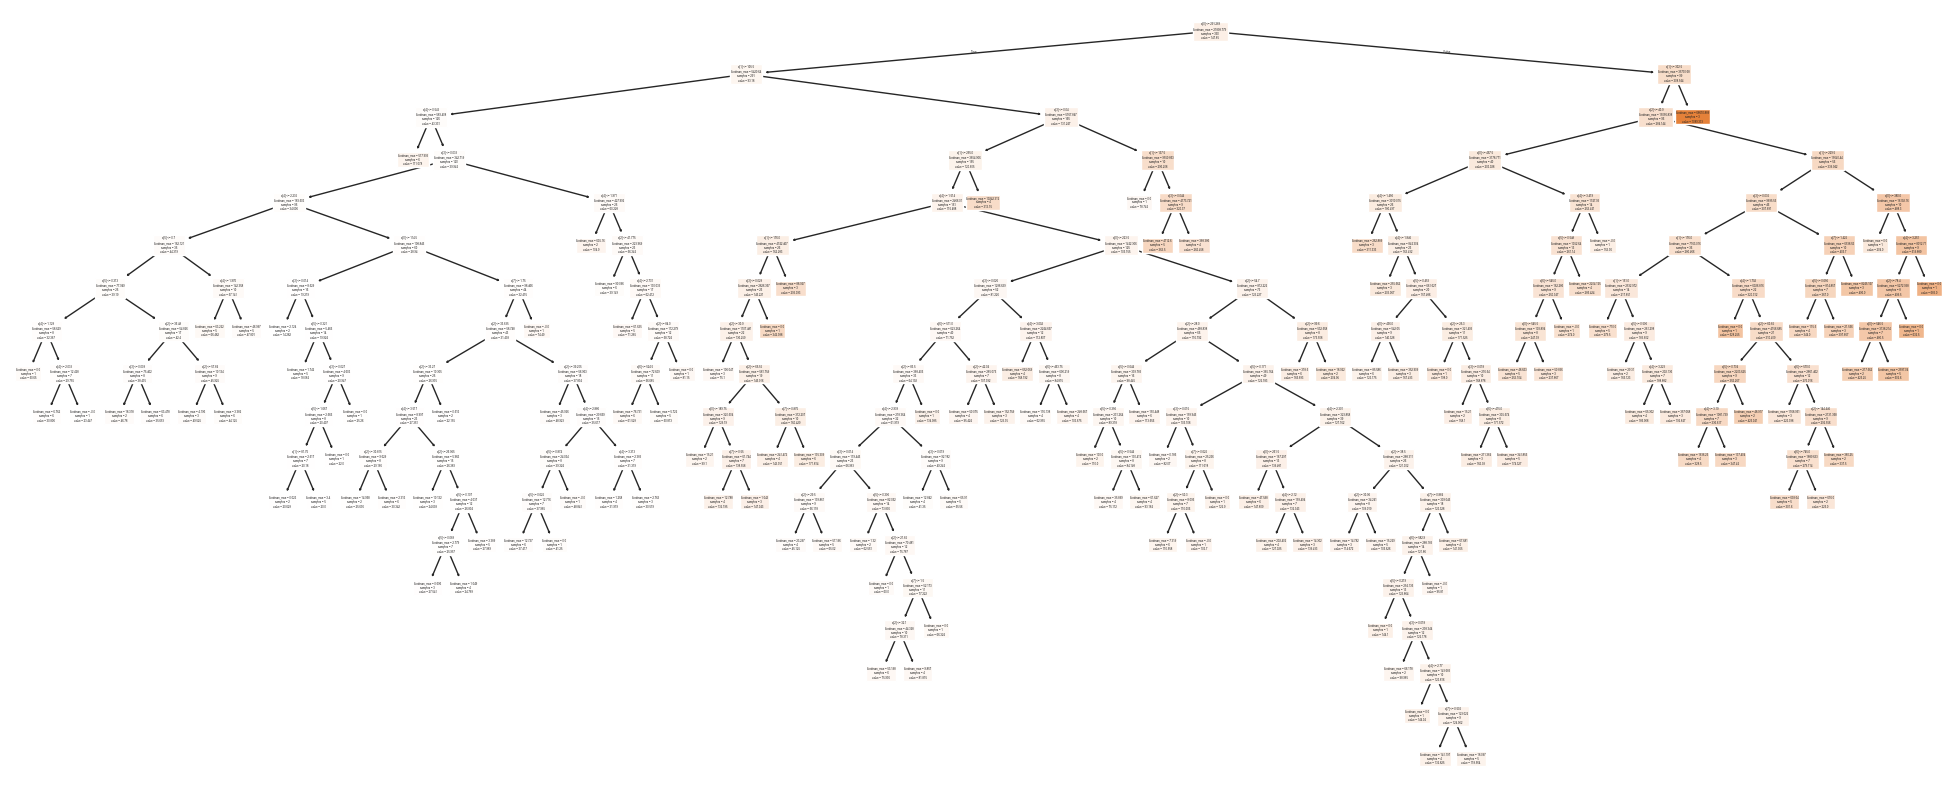

In [19]:
from sklearn import tree
plt.figure(figsize =(25,10))
fontsize=15
tree.plot_tree(DTR,filled = True)
plt.show()

### hyperparameter tunning  (optimization)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param = { 'criterion':['squared_error','friedman_mse', 'absolute_error','poisson'],
          'splitter':['best','random'],
          'min_samples_split': range(2,20),
          'min_samples_leaf': range(1,20)
                    }

In [22]:
gcv=GridSearchCV(estimator=DTR ,param_grid=param ,n_jobs=-1,cv=10)

In [23]:
gcv.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             min_samples_split=7),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [24]:
gcv.best_params_

{'criterion': 'poisson',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'splitter': 'random'}

In [25]:
DTR_O = DecisionTreeRegressor(criterion = 'friedman_mse', min_samples_leaf = 1, min_samples_split = 3)

In [26]:
DTR_O.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=3)

In [27]:
y_pred_train = DTR_O.predict(X_train)
y_pred_test = DTR_O.predict(X_test)

### Evaluating The optimized model

In [28]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,DTR_O.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,DTR_O.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,DTR_O.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,DTR_O.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,DTR_O.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,DTR_O.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,DTR_O.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,DTR_O.predict(X_train)))

The RMSE  on the testing dataset is:  43.92285262877926
The RMSE  on the training dataset is:  12.092383198286342
The MSE  on the testing dataset is:  1929.216983049461
The MSE  on the training dataset is:  146.2257314141978
The MAE  on the testing dataset is:  26.60589460564626
The MAE  on the training daset is:  4.288869880948718
The r2_score on the testing dataset is:  0.9214008974965502
The r2_score on the training dataset is:  0.9933229584556392


### Feature importace for DT regression

In [33]:
DTR_O.feature_importances_

array([0.41800725, 0.36448601, 0.06652297, 0.08247079, 0.04758957,
       0.01092306, 0.00429868, 0.00570167])

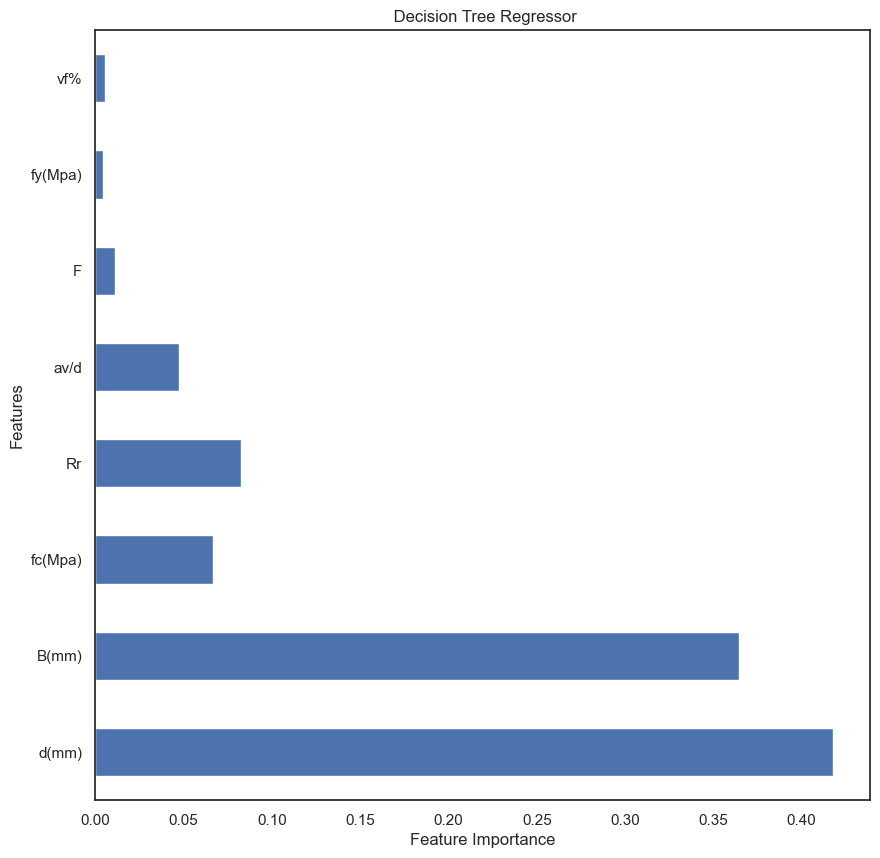

In [37]:
importances = pd.Series(DTR_O.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(10,10))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(" Decision Tree Regressor")
plt.show()

### Actual Vs Predicted Capacity

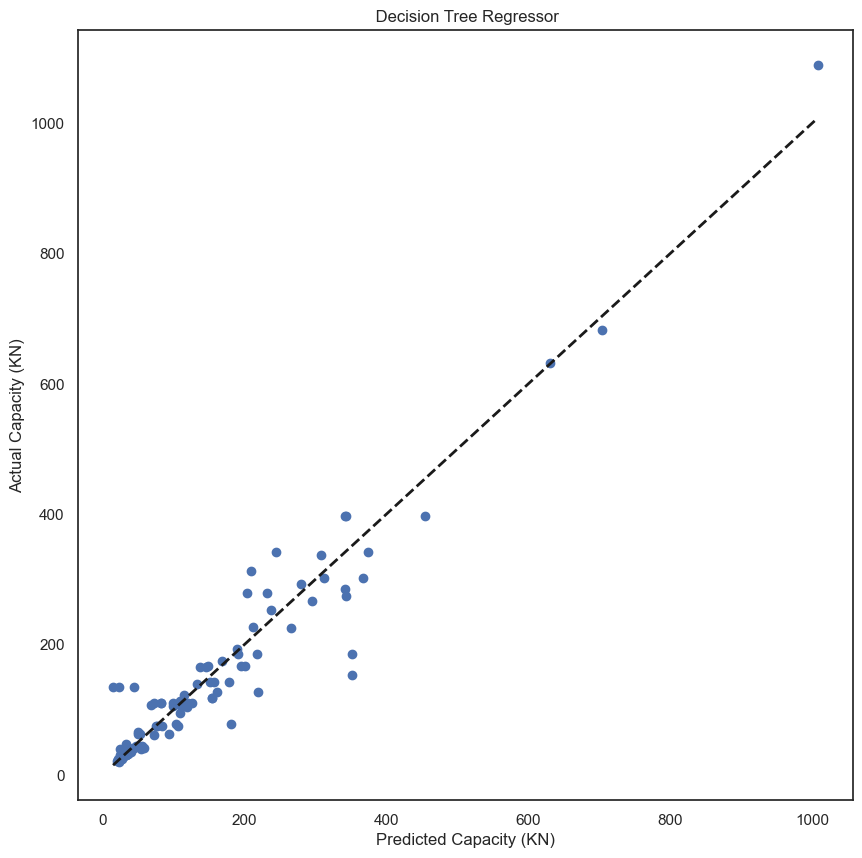

In [16]:
plt.figure(figsize=(10,10))
sns.set_style("white")
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title(" Decision Tree Regressor")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [46]:
X1 = np.array(X)

In [47]:
X1[0].reshape(1,-1)

array([[2.5100e+02, 1.5000e+02, 2.8100e+01, 2.6700e-02, 3.0876e+00,
        4.8750e-01, 5.6500e+02, 7.5000e-01]])

In [48]:
DTR_O.predict(X1[0].reshape(1,-1))

array([112.00875])

### Pickling The Model For Deployment

In [49]:
import pickle
with open('DTR_O_pkl', 'wb')as f:
    pickle.dump(DTR_O,f)

In [50]:
pickled_model = pickle.load(open('DTR_O_pkl', 'rb'))

In [51]:
pickled_model.predict(scaler.transform(X1[0].reshape(1,-1)))

array([142.20277585])

In [52]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([81.2])